In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product k.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product K,Multivitamin,January,2019,505010,797644,8355561,1
2019-02-01,Product K,Multivitamin,February,2019,521132,823109,8622305,2
2019-03-01,Product K,Multivitamin,March,2019,580897,917505,9611137,3
2019-04-01,Product K,Multivitamin,April,2019,612559,967514,10134996,4
2019-05-01,Product K,Multivitamin,May,2019,550697,869805,9111468,5
2019-06-01,Product K,Multivitamin,June,2019,552137,872080,9135293,6
2019-07-01,Product K,Multivitamin,July,2019,489712,773482,8102450,7
2019-08-01,Product K,Multivitamin,August,2019,597098,943094,9879188,8
2019-09-01,Product K,Multivitamin,September,2019,621078,980970,10275945,9


In [4]:
sales_k= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_k.shape

(60, 3)

In [6]:
sales_k.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_k['Sales'].sum())
print('Total Market Size:',sales_k['Market Size'].sum())
print('Total Marketing Expense:', sales_k['Marketing Expense'].sum())

Total Sales: 32299304
Total Market Size: 71977388
Total Marketing Expense: 279528743


Text(0.5, 1.0, 'Product K')

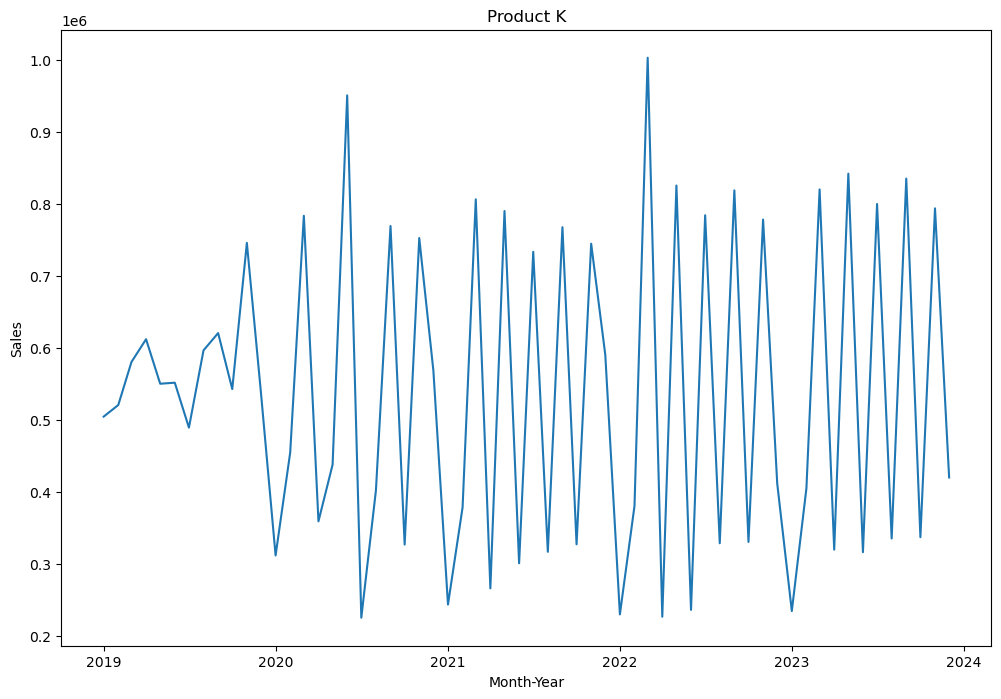

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_k['Sales'])
plt.title('Product K')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_k['Sales'])

ADF Statistics: -4.339743021722731
p- value: 0.0003788479952270515
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


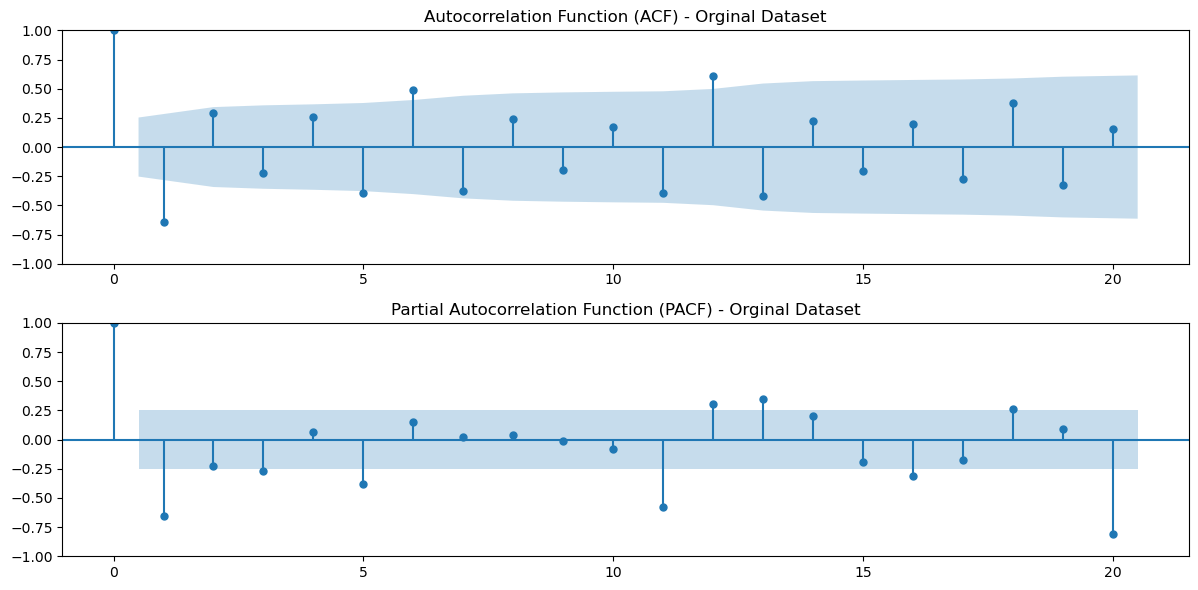

In [12]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_k['Sales'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_k['Sales'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [13]:
train= sales_k[:54]
test=sales_k[54:]

In [14]:
len(train)

54

In [15]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [16]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [17]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [18]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(4):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,0,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_k)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [19]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic            mae           mse           rmse
1   0  1  1424.210018  1434.154938  149159.781435  5.169932e+10  227374.851879
8   2  0  1424.604921  1436.538825  150976.067047  5.200540e+10  228046.915507
13  3  1  1424.697883  1440.609755  138701.139453  4.073344e+10  201825.282593
18  4  2  1425.021018  1444.910858  114527.667755  2.626788e+10  162073.685454
5   1  1  1426.183708  1438.117612  149018.584787  5.166313e+10  227295.255226
12  3  0  1426.503636  1440.426525  150546.541777  5.168591e+10  227345.364359
9   2  1  1426.624783  1440.547672  150893.442369  5.187794e+10  227767.290479
2   0  2  1426.711522  1438.645426  148859.037862  5.162733e+10  227216.483333
3   0  3  1427.329930  1441.252819  149380.884757  5.145874e+10  226845.179630
19  4  3  1427.450721  1449.329545  118326.131744  2.639150e+10  162454.597064
22  5  2  1427.542903  1449.421727  124341.410043  2.690782e+10  164036.026358
4   1  0  1427.811132  1437.756053  144894.900702  5

In [20]:
m_arima= ARIMA(train['Sales'], order=(0,0,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   54
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -707.105
Date:                Thu, 09 May 2024   AIC                           1424.210
Time:                        19:59:37   BIC                           1434.155
Sample:                    01-01-2019   HQIC                          1428.045
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.149e+05    4.8e+04      2.393      0.017    2.08e+04    2.09e+05
Market Size           0.2684      0.030      8.921      0.000       0.209       0.327
Marketing Expense     0.

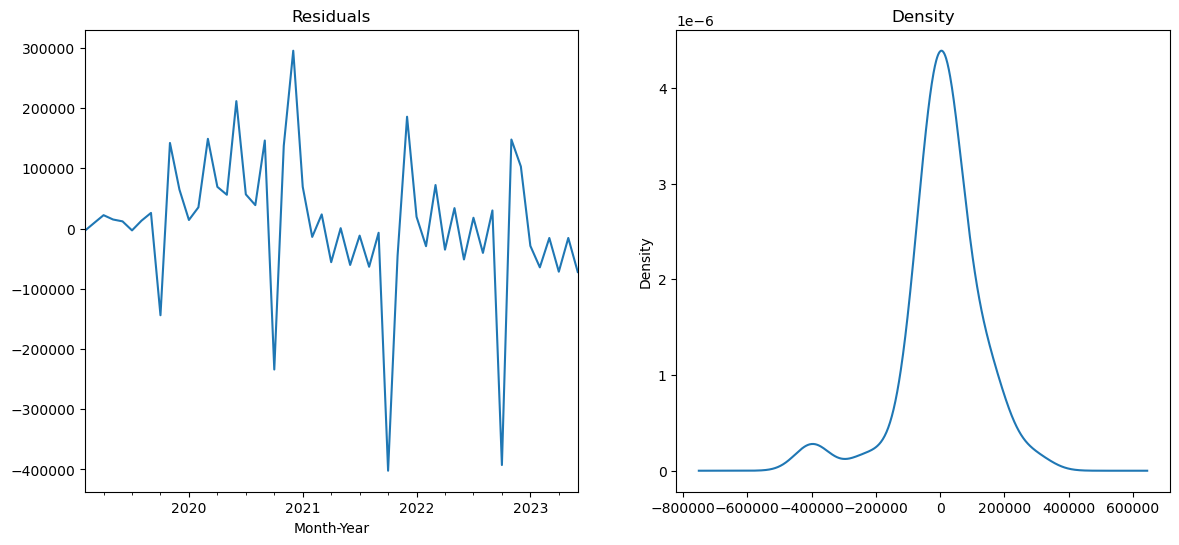

In [21]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

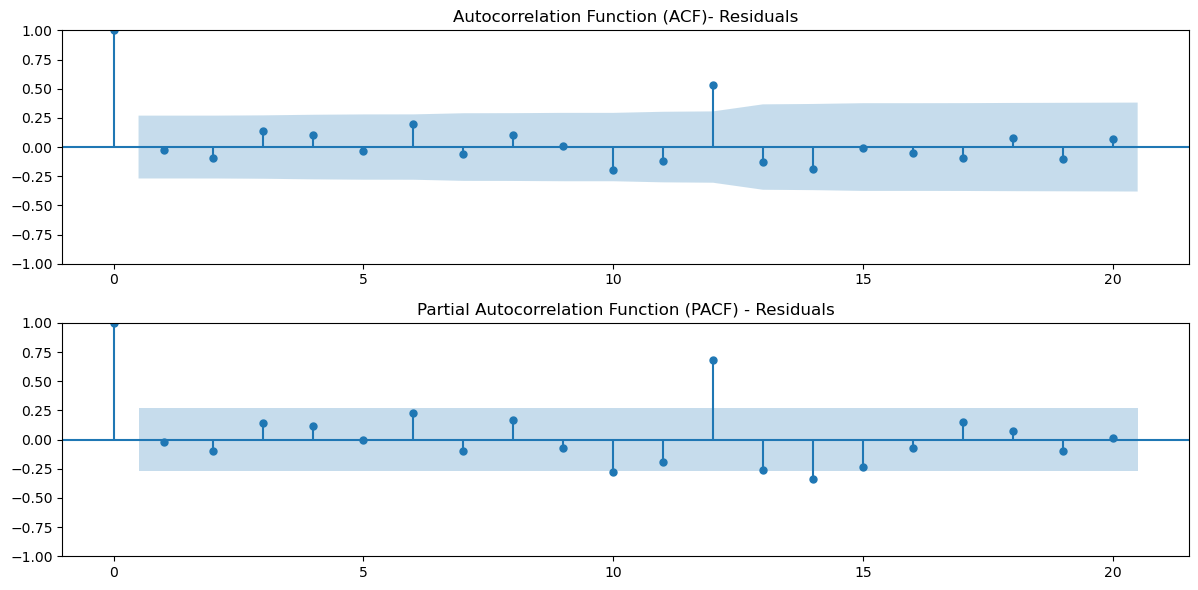

In [22]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

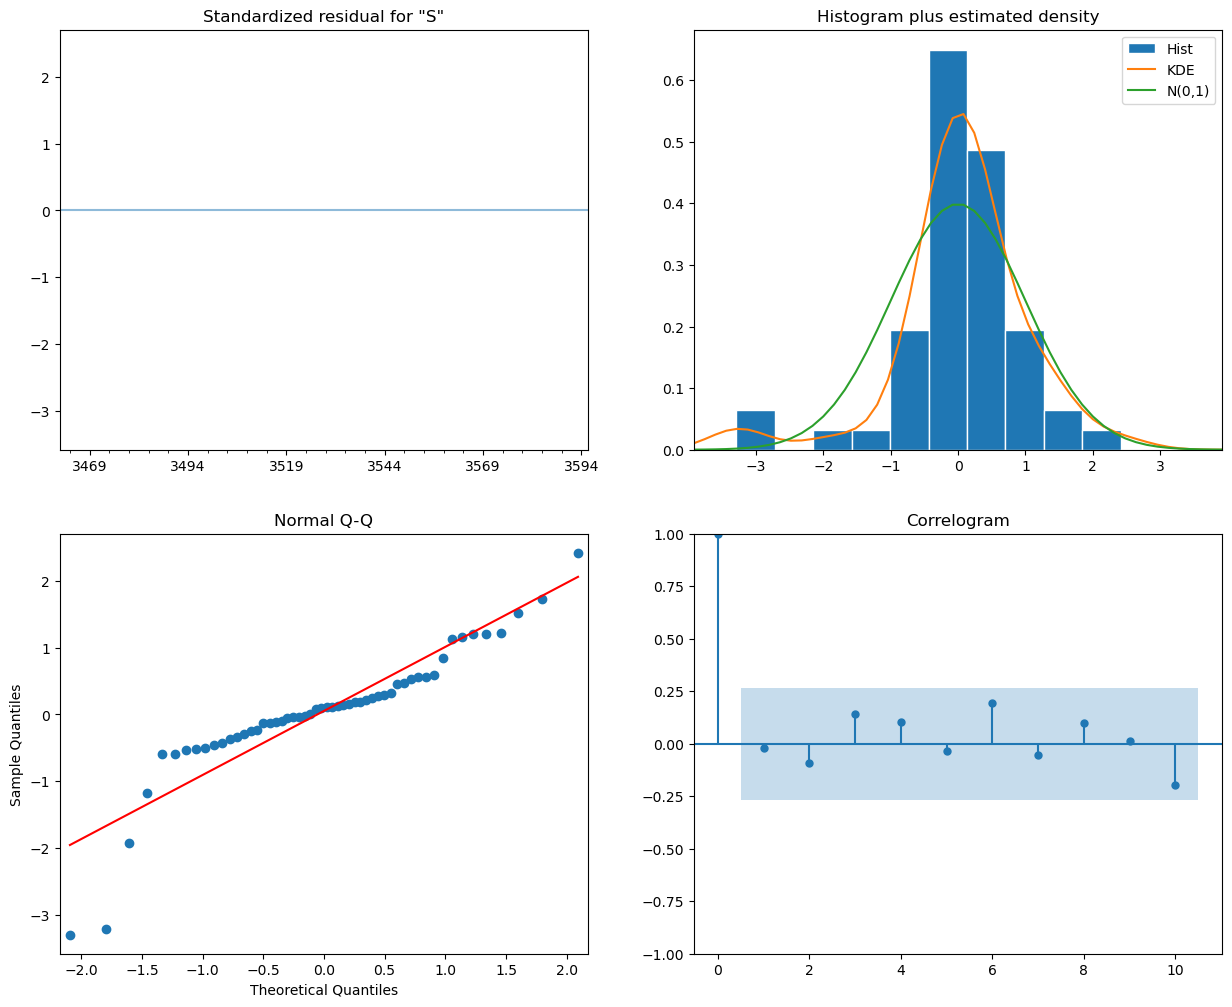

In [23]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [24]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [25]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [26]:
pred=model_arima.predict(start=len(train), end=(len(sales_k)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_k['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [27]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

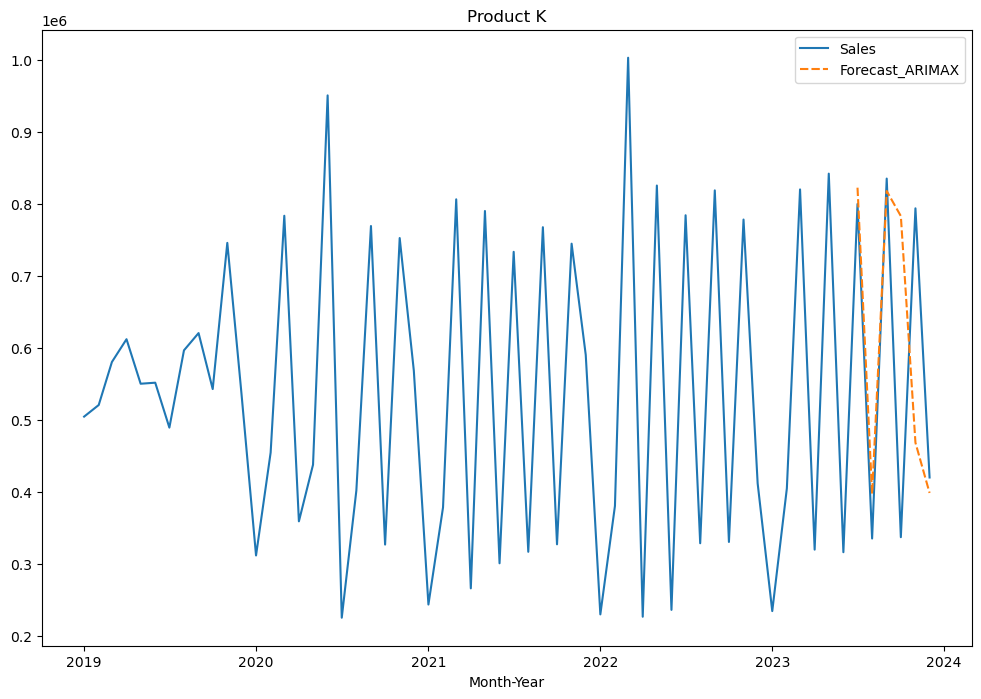

In [28]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_ARIMAX']])
plt.title('Product K')
plt.show()

In [29]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 149159.78143496416
MAPE - ARIMAX: 0.33602561097461514
MSE - ARIMAX: 51699323267.178
RMSE - ARIMAX: 227374.8518793976


# SARIMA

In [30]:
import statsmodels.api as sm

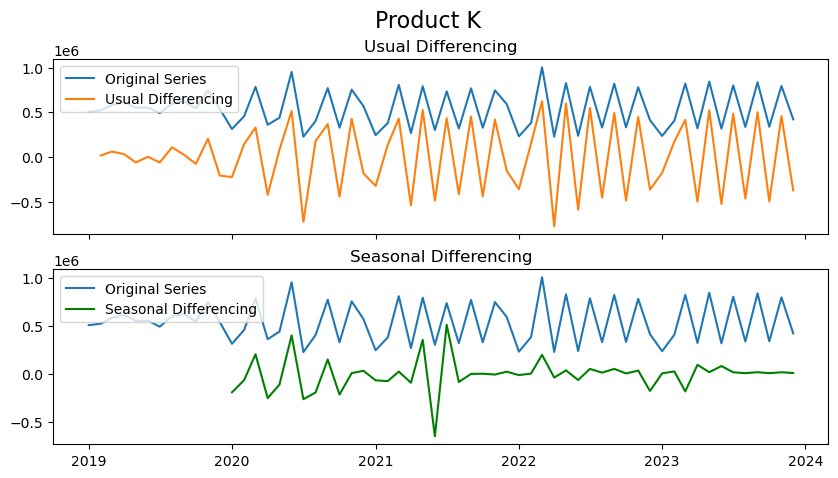

In [31]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_k['Sales'], label='Original Series')
axes[0].plot(sales_k['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_k['Sales'], label='Original Series')
axes[1].plot(sales_k['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product K', fontsize=16)
plt.show()

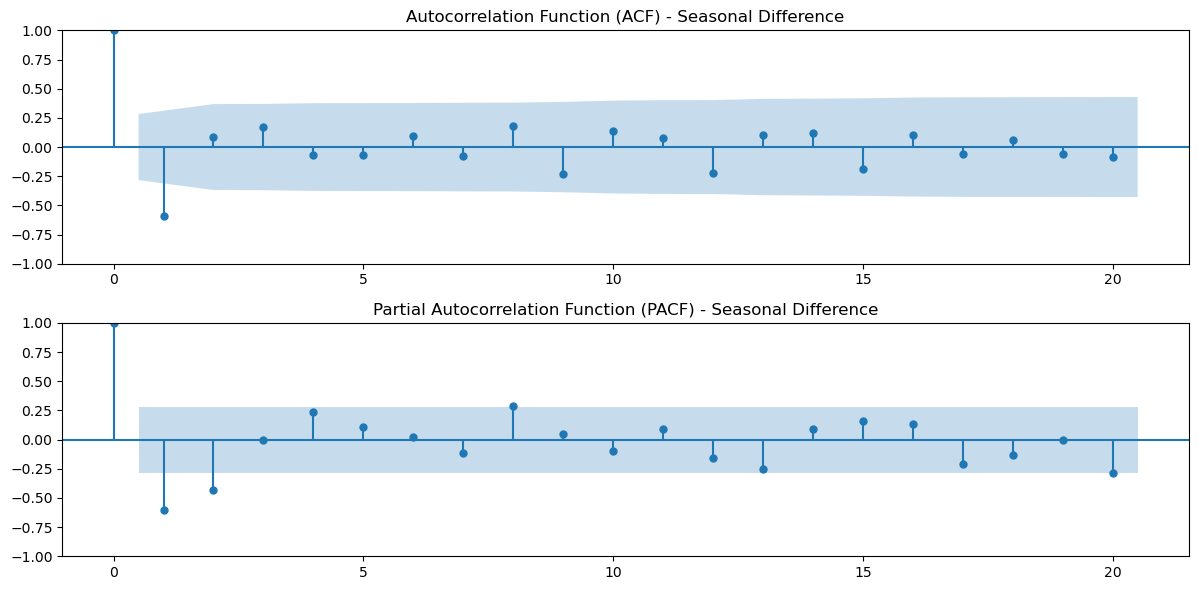

In [32]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_k['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_k['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

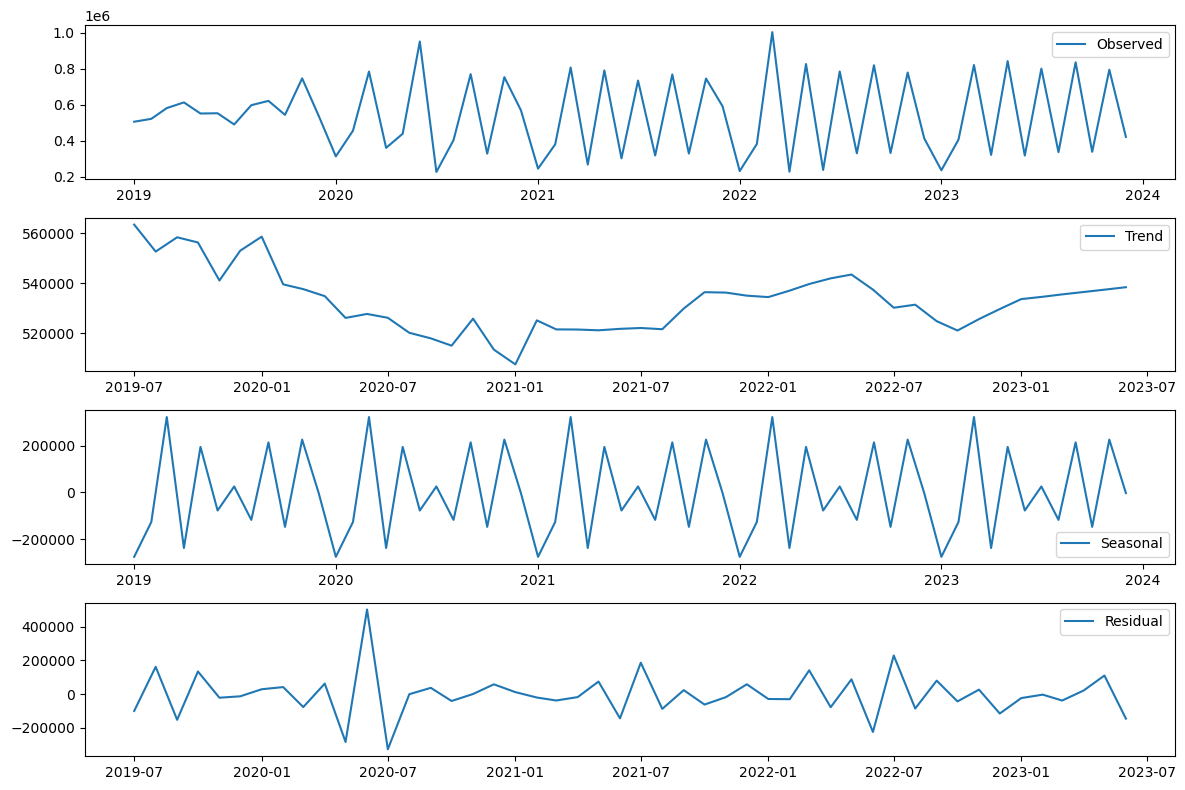

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_k['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [34]:
order_SARIMAX=[]
# Loop over P order
for P in range(4):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(0, 0, 1), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [35]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

   P  Q          aic          bic           mae           mse
4  2  0  1070.919304  1081.345322  32396.469080  1.290277e+09
5  2  1  1074.323942  1086.487629  10728.740932  2.595360e+08
7  3  1  1074.339544  1088.240901  25506.297258  8.993770e+08
3  1  1  1077.829823  1088.255841  24664.586236  8.758625e+08
0  0  0  1078.363893  1085.314572  16784.736158  3.789272e+08
6  3  0  1079.415799  1091.579487  47007.598049  3.780024e+09
1  0  1  1080.363674  1089.052022  16885.396428  3.814701e+08
2  1  0  1080.363828  1089.052176  16821.489209  3.799234e+08


In [36]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(0, 0, 1),seasonal_order=(2,1,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   54
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood                -529.460
Date:                             Thu, 09 May 2024   AIC                           1070.919
Time:                                     20:01:52   BIC                           1081.345
Sample:                                 01-01-2019   HQIC                          1074.741
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2988      0.031      9.639      0.000       0.238       0.360
Market

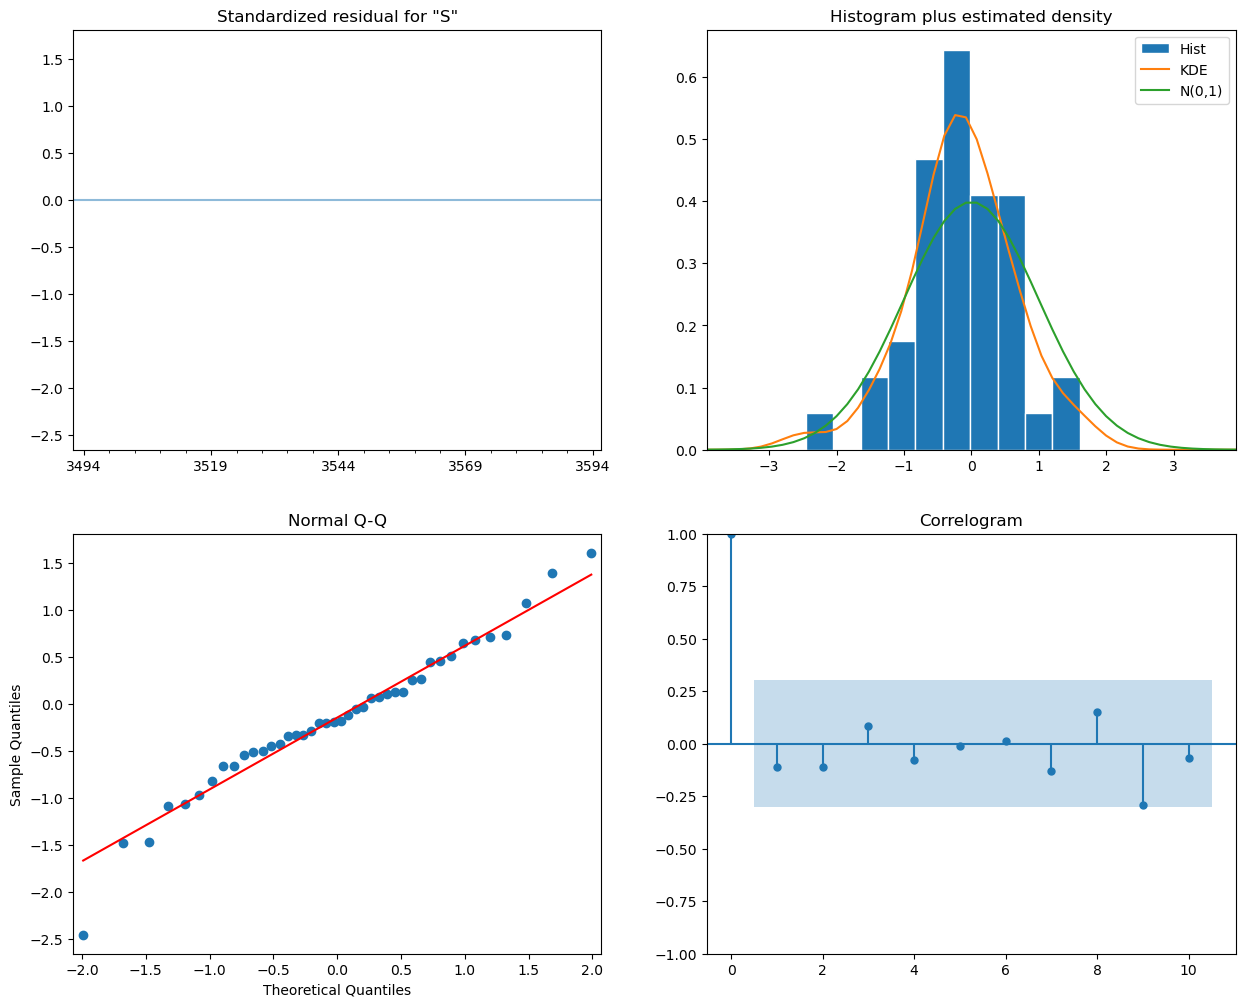

In [37]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [38]:
forecast_test_sarima=sarima_model.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [39]:
sales_k['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product K')

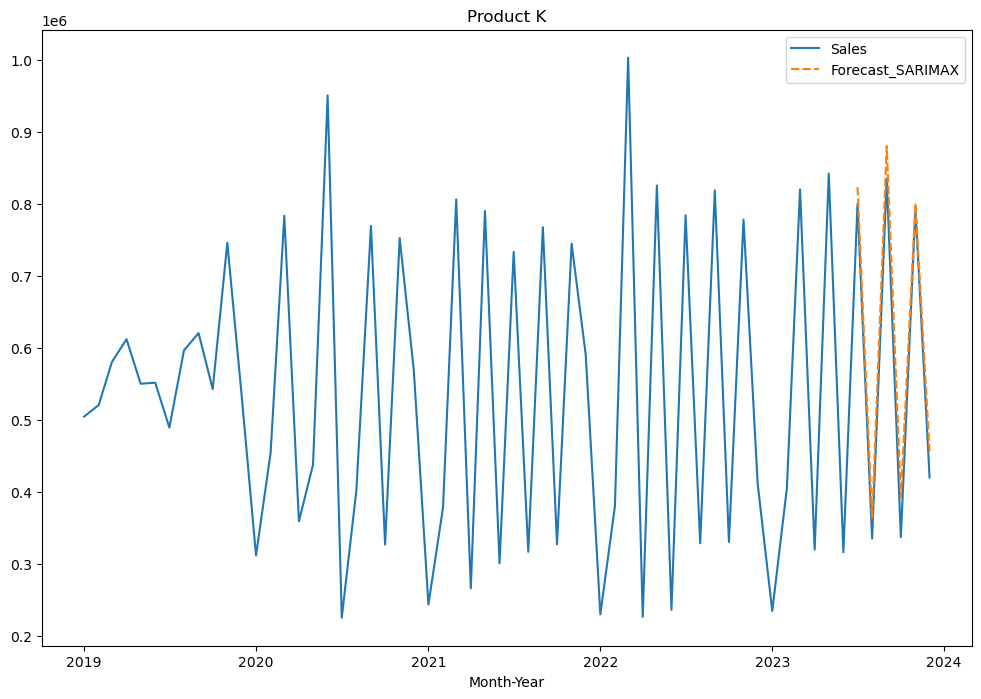

In [40]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_SARIMAX']])
plt.title('Product K')

In [41]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 32396.469
MAPE - SARIMAX: 0.071
MSE - SARIMAX: 1290276560.887
RMSE - SARIMAX: 35920.42


# AUTO-ARIMA

In [42]:
import pmdarima as pm

In [43]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=0, start_q=0, max_p=6,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=4 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1142.549, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1143.082, Time=0.11 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1145.060, Time=0.21 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1143.096, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1145.080, Time=0.46 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1144.967, Time=0.18 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1146.804, Time=1.01 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=1146.925, Time=2.07 sec
 ARIMA(0,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=8.67 sec
 ARIMA(0,0,0)(3,1,2)[12] intercept   : AIC=1150.652, Time=7.45 sec
 ARIMA(0,0,0)(4,1,0)[12] intercept   : AIC=1148.892, Time=1.31 sec
 ARIMA(0,0,0)(4,1,1)[12] intercept   : AIC=inf, Time=6.08 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1132.962, Time=0.08 sec
 ARIMA(0,0,1)(0

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [44]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   54
Model:             SARIMAX(0, 0, 2)x(1, 1, [], 12)   Log Likelihood                -556.569
Date:                             Thu, 09 May 2024   AIC                           1123.139
Time:                                     20:04:47   BIC                           1131.827
Sample:                                 01-01-2019   HQIC                          1126.323
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.483e+04   1.47e+04     -1.006      0.314   -4.37e+04    1.41e+04
ma.L1         -0.6710      0.080     -8.353      0.000      -0.828      -0.514
ma.L2          0.2983      0.065      4.594      0.000       0.171       0.426
ar.S.L12      -0.0754      0.041     -1.861      0.063      -0.155       0.004
sigma2       1.57e+10      0.019   8.23e+11      0.000    1.57e+10    1.57e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.81   Jarque-Bera (JB):                 3.04
Prob(Q):                              0.05   Prob(JB):                         0.22
Heteroskedasticity (H):               0.32   Skew:                            -0.09
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.19e+27. Standard errors may be unstable.
"""

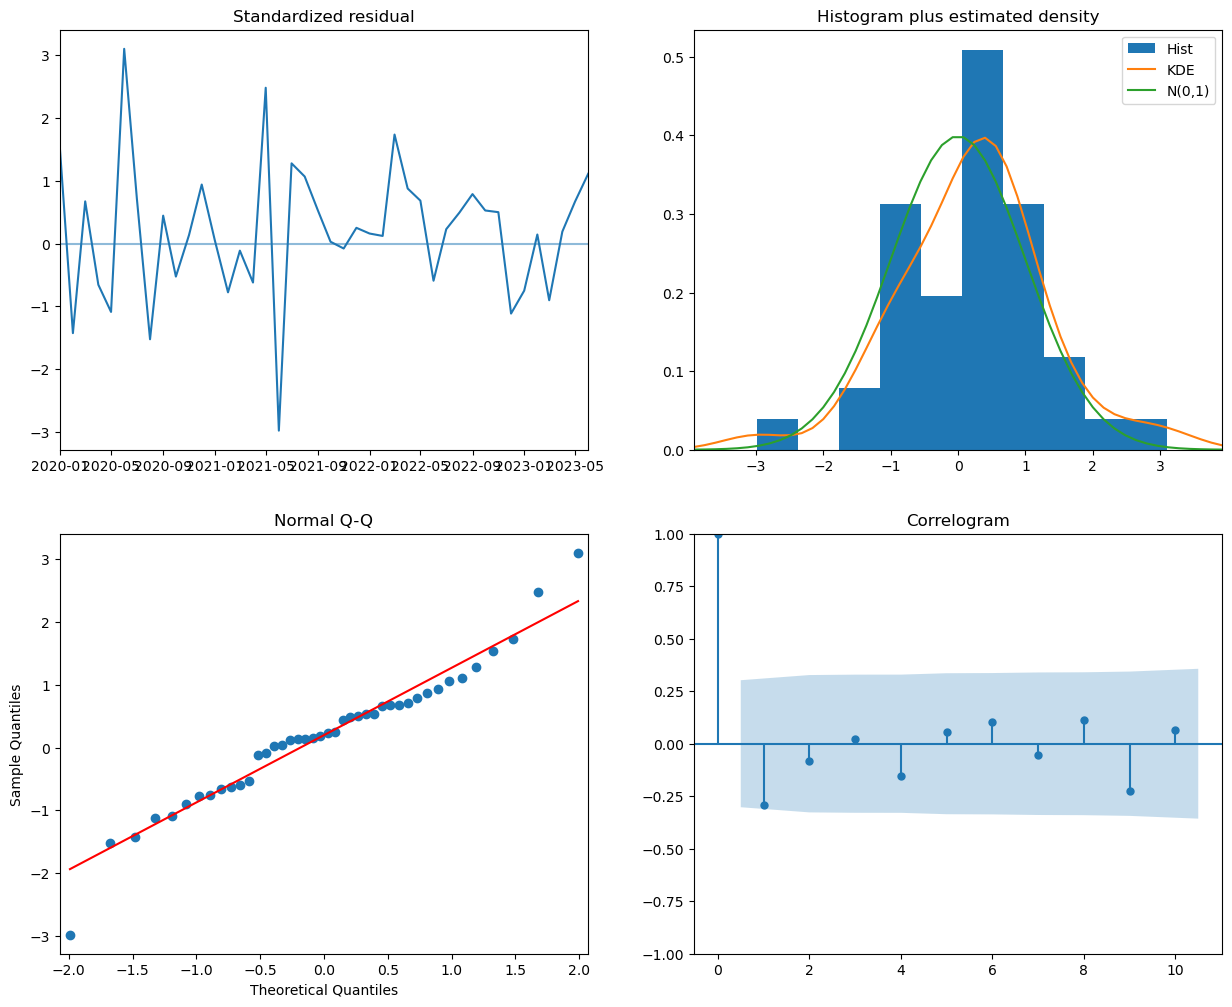

In [45]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [46]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_k['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product K')

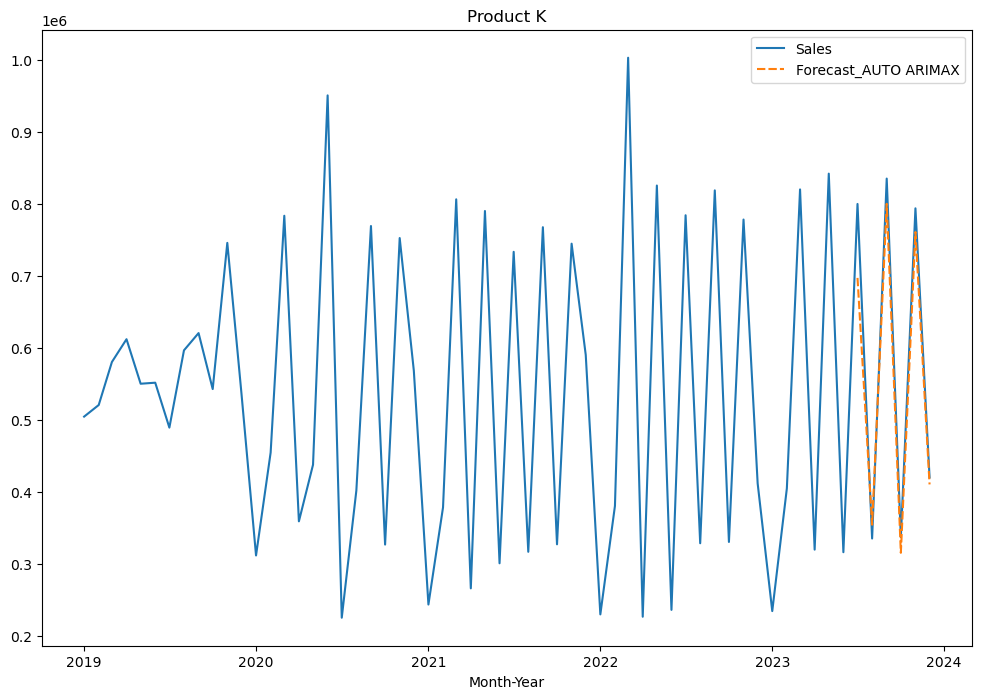

In [47]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product K')

In [48]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 36875.9780182428
MAPE - AUTO ARIMAX: 0.059358074972561126
MSE - AUTO ARIMAX: 2300346287.1134825
RMSE - AUTO ARIMAX: 47961.925389974516


In [49]:
sales_k.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,234804,558252,2201850,NaN,NaN,NaN
2023-02-01,405296,963600,3800621,NaN,NaN,NaN
2023-03-01,820679,1951182,7695831,NaN,NaN,NaN
2023-04-01,320174,761221,3002398,NaN,NaN,NaN
2023-05-01,842609,2003321,7901477,NaN,NaN,NaN
2023-06-01,316593,752707,2968817,NaN,NaN,NaN
2023-07-01,800485,1903171,7506464,823095.054963,823850.006655,697743.472691
2023-08-01,335618,797939,3147222,397407.490685,362938.029340,354833.993195
2023-09-01,835745,1987002,7837111,818444.136460,880958.238887,800676.484262


In [50]:
sales_k.mean()

Sales                   5.383217e+05
Market Size             1.199623e+06
Marketing Expense       4.658812e+06
Forecast_ARIMAX         6.150584e+05
Forecast_SARIMAX        6.197530e+05
Forecast_AUTO ARIMAX    5.568859e+05
dtype: float64

In [51]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,149159.781435,0.336026,5.169932e+10,227374.851879
AUTO ARIMAX,36875.978018,0.059358,2.300346e+09,47961.925390
SEASONAL ARIMAX,32396.469080,0.070543,1.290277e+09,35920.419832


# TESTING

In [17]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1142.549, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1143.082, Time=0.13 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1145.060, Time=0.34 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1143.096, Time=0.11 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1145.080, Time=0.79 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1144.967, Time=0.30 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1146.804, Time=1.59 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.72 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1132.962, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1134.951, Time=0.30 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1136.266, Time=1.05 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1134.859, Time=0.33 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(0,0,1)(2

ARIMA(order=(0, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [18]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   54
Model:             SARIMAX(0, 0, 2)x(1, 1, [], 12)   Log Likelihood                -556.569
Date:                             Wed, 08 May 2024   AIC                           1123.139
Time:                                     20:35:36   BIC                           1131.827
Sample:                                 01-01-2019   HQIC                          1126.323
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.483e+04   1.47e+04     -1.006      0.314   -4.37e+04    1.41e+04
ma.L1         -0.6710      0.080     -8.353      0.000      -0.828      -0.514
ma.L2          0.2983      0.065      4.594      0.000       0.171       0.426
ar.S.L12      -0.0754      0.041     -1.861      0.063      -0.155       0.004
sigma2       1.57e+10      0.019   8.23e+11      0.000    1.57e+10    1.57e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.81   Jarque-Bera (JB):                 3.04
Prob(Q):                              0.05   Prob(JB):                         0.22
Heteroskedasticity (H):               0.32   Skew:                            -0.09
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.19e+27. Standard errors may be unstable.
"""

In [19]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_k['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product K')

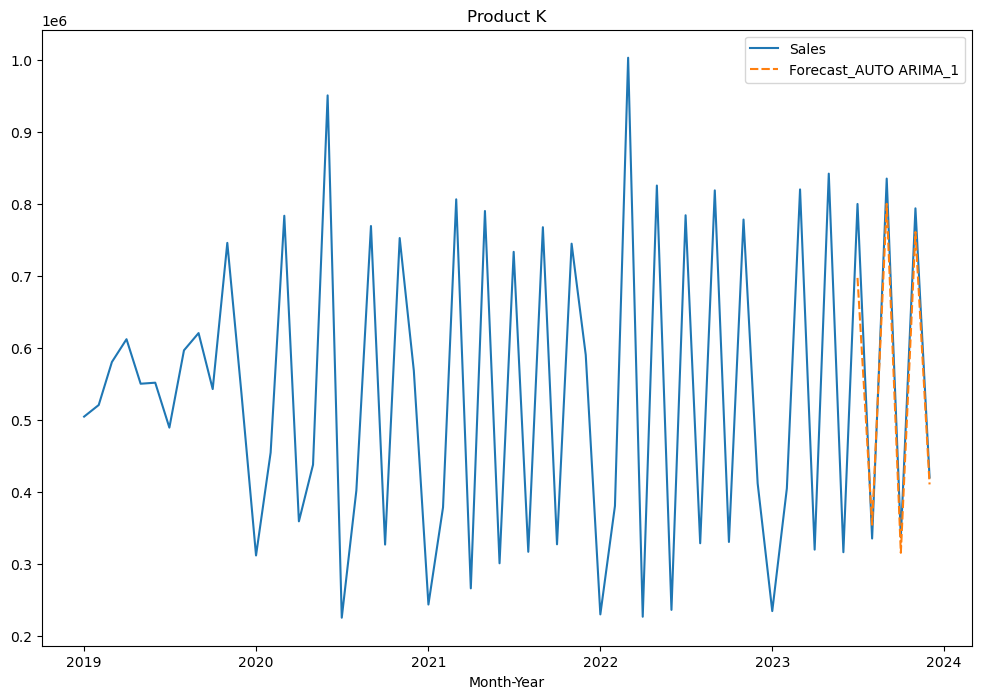

In [20]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_k[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product K')

In [21]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 36875.9780182428
MAPE - AUTO ARIMA: 0.059358074972561126
MSE - AUTO ARIMA: 2300346287.1134825
RMSE - AUTO ARIMA: 47961.925389974516
